<a href="https://colab.research.google.com/github/VietPham1005/Machine-Learning/blob/main/vnstock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install vnstock

In [ ]:
from vnstock import *

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout, Embedding, Bidirectional, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
import tensorflow as tf

In [ ]:
#danh sách các mã cổ phiếu
listing_companies()

,ticker,comGroupCode,organName,organShortName,organTypeCode,comTypeCode,icbName,icbNamePath,sector,industry,...,VNCOND,VNCONS,VNENE,VNFIN,VNHEAL,VNIND,VNIT,VNMAT,VNREAL,VNUTI
0,VVS,UpcomIndex,Công ty Cổ phần Đầu tư Phát triển Máy Việt Nam,Đầu tư Phát triển Máy Việt Nam,DN,CT,Sản xuất ô tô,Hàng Tiêu dùng/Ô tô và phụ tùng/Ô tô và phụ tù...,Hàng Tiêu dùng,Ô tô và phụ tùng,...,False,False,False,False,False,False,False,False,False,False
1,XDC,UpcomIndex,Công ty TNHH MTV Xây dựng Công trình Tân Cảng,Xây dựng Công trình Tân Cảng,DN,CT,Xây dựng,Công nghiệp/Xây dựng và Vật liệu/Xây dựng và V...,Công nghiệp,Xây dựng và Vật liệu,...,False,False,False,False,False,False,False,False,False,False
2,HSV,UpcomIndex,Công ty Cổ phần Tập đoàn HSV Việt Nam,Gang Thép Hà Nội,DN,CT,Thép và sản phẩm thép,Nguyên vật liệu/Tài nguyên Cơ bản/Kim loại/Thé...,Nguyên vật liệu,Tài nguyên Cơ bản,...,False,False,False,False,False,False,False,False,False,False
3,CST,UpcomIndex,Công ty Cổ phần Than Cao Sơn - TKV,Than Cao Sơn - TKV,DN,CT,Khai thác Than,Nguyên vật liệu/Tài nguyên Cơ bản/Khai khoáng/...,Nguyên vật liệu,Tài nguyên Cơ bản,...,False,False,False,False,False,False,False,False,False,False
4,BVL,UpcomIndex,Công ty Cổ phần BV Land,BV Land,DN,CT,"Tư Vấn, Định giá, Môi giới Bất động sản","Tài chính/Bất động sản/Bất động sản/Tư Vấn, Đị...",Tài chính,Bất động sản,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,XMP,UpcomIndex,Công ty Cổ phần Thủy điện Xuân Minh,Thủy điện Xuân Minh,DN,CT,Sản xuất & Phân phối Điện,"Tiện ích Cộng đồng/Điện, nước & xăng dầu khí đ...",Tiện ích Cộng đồng,"Điện, nước & xăng dầu khí đốt",...,False,False,False,False,False,False,False,False,False,False
1612,YBC,UpcomIndex,Công ty Cổ phần Xi măng và Khoáng sản Yên Bái,Xi măng và Khoáng sản Yên Bái,DN,CT,Vật liệu xây dựng & Nội thất,Công nghiệp/Xây dựng và Vật liệu/Xây dựng và V...,Công nghiệp,Xây dựng và Vật liệu,...,False,False,False,False,False,False,False,False,False,False
1613,YBM,VNINDEX,Công ty Cổ phần Khoáng sản Công nghiệp Yên Bái,Khoáng sản CN Yên Bái,DN,CT,Khai khoáng,Nguyên vật liệu/Tài nguyên Cơ bản/Khai khoáng/...,Nguyên vật liệu,Tài nguyên Cơ bản,...,False,False,False,False,False,False,False,False,False,False
1614,YEG,VNINDEX,Công ty Cổ phần Tập đoàn Yeah1,Tập đoàn Yeah1,DN,CT,Giải trí & Truyền thông,Dịch vụ Tiêu dùng/Truyền thông/Truyền thông/Gi...,Dịch vụ Tiêu dùng,Truyền thông,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
company_overview('VNM') #tóm tắt thông tin cổ phiếu

,exchange,shortName,industryID,industryIDv2,industry,industryEn,establishedYear,noEmployees,noShareholders,foreignPercent,website,stockRating,deltaInWeek,deltaInMonth,deltaInYear,outstandingShare,issueShare,companyType,ticker
0,HOSE,VINAMILK,218,3577,Thực phẩm và đồ uống,Food & Beverage,2003,8082,0,0.54,http://www.vinamilk.com.vn,3.7,-0.017,0.041,0.031,2090.0,2090.0,CT,VNM


In [ ]:
df =  stock_historical_data(symbol='VNM', start_date="2003-01-01", end_date="2023-07-07")
df

,time,open,high,low,close,volume
0,2012-03-20 07:00:00+07:00,16.09,16.18,16.00,16.09,48840
1,2012-03-21 07:00:00+07:00,16.18,16.18,16.09,16.09,74890
2,2012-03-22 07:00:00+07:00,16.09,16.18,16.09,16.09,65490
3,2012-03-23 07:00:00+07:00,16.09,16.88,16.09,16.88,268540
4,2012-03-26 07:00:00+07:00,16.88,17.06,16.52,16.61,112890
...,...,...,...,...,...,...
2816,2023-06-30 09:00:00+07:00,71.90,72.00,70.80,71.00,3645000
2817,2023-07-03 09:00:00+07:00,71.10,71.40,70.30,70.70,3186200
2818,2023-07-04 09:00:00+07:00,70.50,71.20,70.10,70.60,4781600
2819,2023-07-05 09:00:00+07:00,70.80,70.80,69.60,69.80,6659200


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df =  stock_historical_data(symbol='VNM', start_date="2003-01-01", end_date="2023-03-08")
df.to_csv('/content/drive/MyDrive/VNM.csv', index=False)

ANALYTIC & PREDICT

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Open         4269 non-null   float64       
 1   High         4269 non-null   float64       
 2   Low          4269 non-null   float64       
 3   Close        4269 non-null   float64       
 4   Volume       4269 non-null   int64         
 5   TradingDate  4269 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 200.2 KB


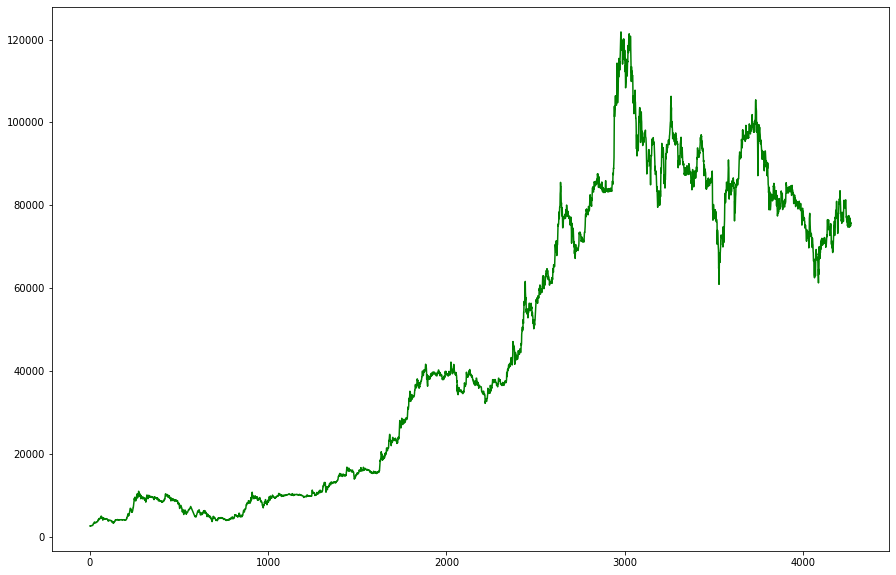

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(df.index, df['Close'], color="green", label="Close")
plt.show()

StandardScaler để thay đổi tỷ lệ các giá trị của chúng tôi trong khoảng từ -1 đến 1.

In [ ]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .80 ))

window_size = 60
training_data_len

3416

In [ ]:
# create scaler
scaler = StandardScaler()
# fit and transform in one step
scaled_data = scaler.fit_transform(dataset)

print ('scaled_data.shape',len(scaled_data))

scaled_data.shape 4269


In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len)]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(window_size, len(train_data)):
    x_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])
    if i<= window_size + 1:
        print('x_train',x_train)
        print('\ny_train',y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print ('x_train.shape:',x_train.shape)

x_train [array([-1.22810278, -1.22670908, -1.22878541, -1.22946804, -1.22810278,
       -1.22742015, -1.22810278, -1.22810278, -1.22670908, -1.22534383,
       -1.22534383, -1.22534383, -1.22534383, -1.22534383, -1.22602645,
       -1.22534383, -1.22190224, -1.21846066, -1.21433645, -1.21433645,
       -1.21294275, -1.21226012, -1.21089487, -1.20677066, -1.20332907,
       -1.20193538, -1.20677066, -1.20469433, -1.20469433, -1.20745328,
       -1.20677066, -1.20677066, -1.20469433, -1.20332907, -1.20605959,
       -1.20469433, -1.20332907, -1.20193538, -1.19988749, -1.19988749,
       -1.19849379, -1.19917642, -1.19849379, -1.19849379, -1.19573484,
       -1.190928  , -1.18956274, -1.18404483, -1.18956274, -1.18404483,
       -1.18128588, -1.17716167, -1.17855537, -1.18199695, -1.17855537,
       -1.17579641, -1.17716167, -1.17716167, -1.17579641, -1.17579641])]

y_train [-1.1757964133020429]

x_train [array([-1.22810278, -1.22670908, -1.22878541, -1.22946804, -1.22810278,
       -1.22

In [ ]:
def build_LSTM_model():
    input = tf.keras.layers.Input(
        shape=(x_train.shape[1], 1), name ="input"
    )
    x = tf.keras.layers.Bidirectional(LSTM(128, return_sequences=True))(input)

    x = tf.keras.layers.Bidirectional(LSTM(64, return_sequences=False, dropout=0.5))(x)

    x = tf.keras.layers.Dense(25 , activation="relu", name ="dense_1")(x)

    output = tf.keras.layers.Dense(1, name="last_dense")(x)

    model = tf.keras.Model(inputs=input, outputs=output)

    return model


In [ ]:
LSTM_model = build_LSTM_model()
LSTM_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 60, 1)]           0         
                                                                 
 bidirectional (Bidirectiona  (None, 60, 256)          133120    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 25)                3225      
                                                                 
 last_dense (Dense)          (None, 1)                 26        
                                                                 
Total params: 300,723
Trainable params: 300,723
Non-trainable

In [ ]:
epochs = 20
batch_size = 20
early_stopping_patience = 17


# Compile the model
LSTM_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = LSTM_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/20
 71/168 [===========>..................] - ETA: 22s - loss: 0.0060

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for loss

fig, ax = plt.subplots()
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
